<a href="https://colab.research.google.com/github/ChitteshKumar/udemy_deep_learning_tutorials/blob/main/ImageClassificationRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#loading the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train shape: ", x_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)


In [ ]:
#build model
i = Input(shape=(x_train[0].shape))
x = LSTM(128)(i) #LSTM layer with 128 units connected to the input layer
x = Dense(10, activation='softmax')(x) #Dense layer with 10 units

model = Model(i, x)
model.compile(
    loss = 'sparse_categorical_crossentropy', # sparse categorical crossentropy is used to deal with multi-class classification where classes are mutually exculsive and represented as integer
                                              # -> it is calculated from true labels and predicted probabilites of each class.
    optimizer='adam',
    metrics = ['accuracy']
)

r = model.fit(
    x_train , y_train,
    epochs = 10, validation_data = (x_test, y_test)
)


Epoch 1/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.3426 - accuracy: 0.8903 - val_loss: 0.1168 - val_accuracy: 0.9628
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.0872 - val_accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0732 - accuracy: 0.9779 - val_loss: 0.0727 - val_accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0565 - accuracy: 0.9828 - val_loss: 0.0634 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0534 - val_accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0478 - val_accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0320 - accuracy: 0.9905 - val_loss: 0.0580 -

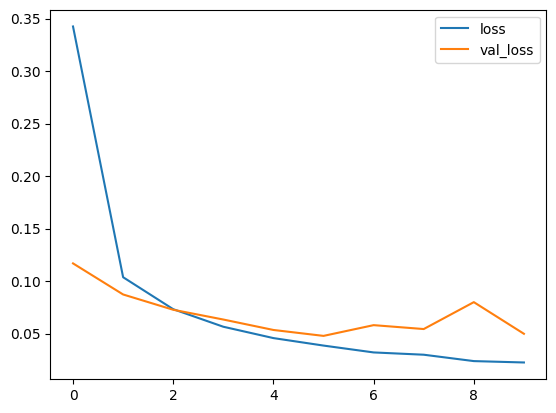

In [ ]:
#plotting the graph
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

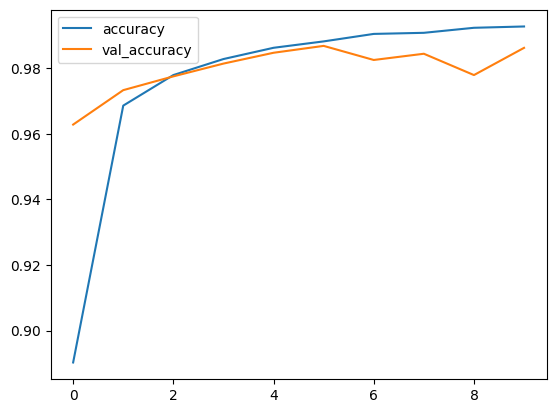

In [ ]:
#plotting the graph
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

#here with high accuracies, model does not have any problem capturing long distance info in the image.

313/313 [==============================] - 9s 28ms/step
Confusion matrix without normalization
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1131    0    0    0    0    0    3    1    0]
 [   4    0 1020    2    1    0    0    5    0    0]
 [   0    0    6  995    0    3    0    4    2    0]
 [   0    0    0    0  962    0    4    2    1   13]
 [   3    1    0    6    0  878    3    1    0    0]
 [  12    2    5    0    5    2  931    0    1    0]
 [   1    3    5    1    0    0    0 1014    0    4]
 [   1    0    3    0    2    3    1    3  958    3]
 [   2    0    0    1    5    2    0    4    0  995]]


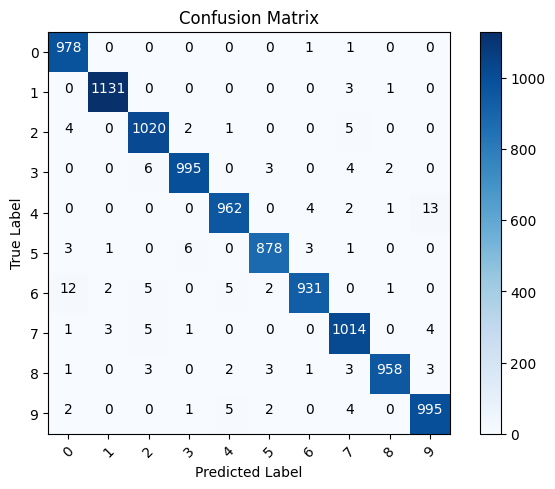

In [ ]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap= plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt), horizontalalignment = 'center', color="white" if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_cm(cm, list(range(10)))